In [1]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from tqdm.notebook import tqdm


train_data = datasets.MNIST(root="./dataset", train=True, transform=transforms.ToTensor(), download=True)
test_data = datasets.MNIST(root="./dataset", train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=False)

logistic_regression_model = nn.Linear(784, 10)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(logistic_regression_model.parameters(), lr=0.1)
 
for images, labels in tqdm(train_loader):
    optimizer.zero_grad()
    x = images.view(-1, 784)
    y = logistic_regression_model(x)
    loss = criterion(y, labels)
    loss.backward()
    optimizer.step()

correct = 0
n = len(test_data)

with torch.no_grad():
    for images,labels in tqdm(test_loader):
        x = images.view(-1,784)
        y = logistic_regression_model(x)
        prediction = torch.argmax(y,dim=1)
        correct+=torch.sum((prediction==labels).float())

print("Accuracy = {}".format(correct/n))

  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy = 0.9031999707221985


In [ ]:
# 2 cells below this cell are for checking visually how our model performs
# add index to load image and label in MNIST test_data
# you will get the image and true label corresponding to the image
# after running the next cell you will get the label predicted by our model

true lable: 4


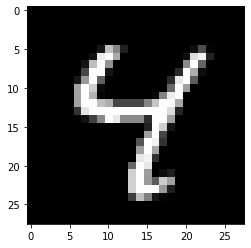

In [29]:
import matplotlib.pyplot as plt

im,lb = test_data[6]
im = im.reshape([28,28])
plt.imshow(im, cmap='gray')
print("true lable: {}".format(lb))

In [30]:
x = im.view(-1,784)
y = logistic_regression_model(x)
prediction = torch.argmax(y,dim=1)
print("predicted label: {}".format(prediction))

predicted label: tensor([4])
